<a href="https://colab.research.google.com/github/AsheriasI/AsheriasI/blob/main/cancer_cell_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancer Cell Classifier

This project uses the breast cancer dataset already loaded into sklearn to classify whether a cancer is benign or malignant.

I used this dataset to get familiar with google colab.

### Importing libraries

In [26]:
# importing all necessary libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.datasets import load_breast_cancer

### Data Loading

In [27]:
# Load data into a Pandas DataFrame

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [28]:
type(data)

sklearn.utils._bunch.Bunch

### Data Visualisation

In [ ]:
# note takes 14 mins to run on google colab run time T4 GPU, produces 30x30=900 plots of each feature vs each feature
# saved png in github repo

# plotting the raw data
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()

## Preprocessing Data

In [29]:
# missing values check
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# drop missing value rows
df = df.dropna()

Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


This dataset seems to be processed already.

In [30]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [31]:
# split data into target and features
X = df.drop('target', axis=1)
y = df['target']

In [32]:
# split into train_test_split
train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.20, random_state=42)

## Training the model

In [33]:
# fitting Naive Bayes
gnb = GaussianNB()
model = gnb.fit(train, train_labels)

## Evaluation

In [34]:
# predictions on test data
predictions = gnb.predict(test)


In [35]:
# evaluation metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)

In [36]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0
F1 Score: 0.9793103448275862


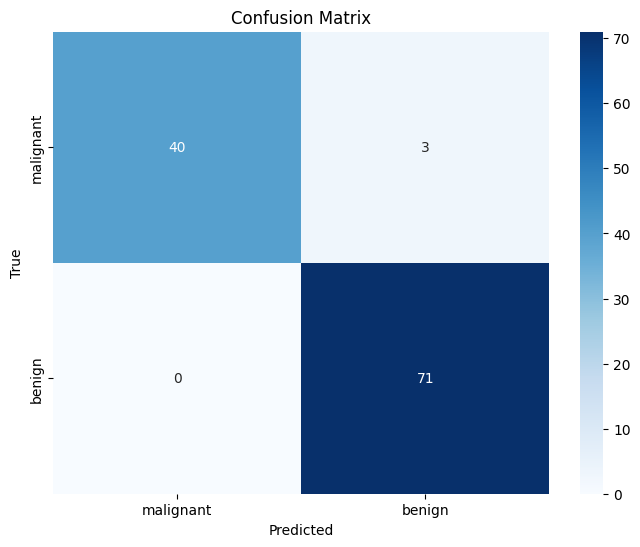

In [37]:
# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Experimenting with permutation 'importance'

Not quite feature importance as is the case for decision trees or ensemble methods

In [38]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(gnb, test, test_labels)

print(imps.importances_mean)

[0.00526316 0.00877193 0.00701754 0.0245614  0.00175439 0.00526316
 0.00526316 0.00350877 0.00175439 0.         0.01754386 0.00175439
 0.01929825 0.08947368 0.         0.         0.00701754 0.
 0.         0.         0.03157895 0.00701754 0.03859649 0.07368421
 0.00701754 0.01052632 0.00877193 0.00526316 0.00350877 0.00701754]


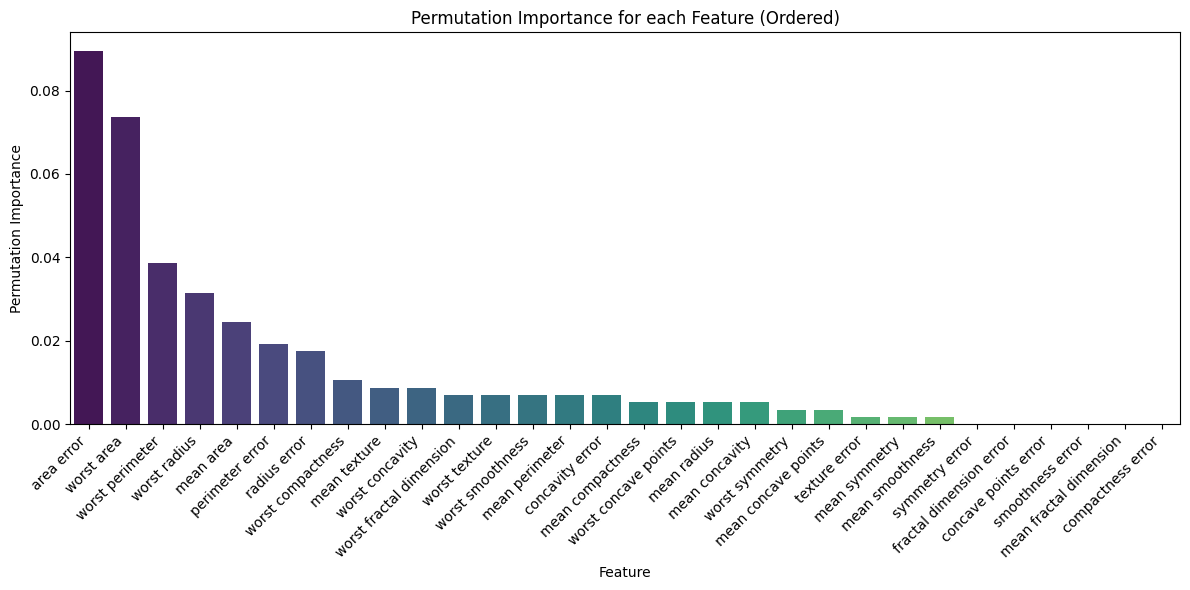

Permutation Importances (Ordered): [0.08947368 0.07368421 0.03859649 0.03157895 0.0245614  0.01929825
 0.01754386 0.01052632 0.00877193 0.00877193 0.00701754 0.00701754
 0.00701754 0.00701754 0.00701754 0.00526316 0.00526316 0.00526316
 0.00526316 0.00350877 0.00350877 0.00175439 0.00175439 0.00175439
 0.         0.         0.         0.         0.         0.        ]


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Permutation Importance': imps.importances_mean})

# Order the DataFrame by Permutation Importance in descending order
importance_df = importance_df.sort_values(by='Permutation Importance', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Permutation Importance', data=importance_df, palette='viridis')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importance for each Feature (Ordered)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Display the ordered array
ordered_importances = importance_df['Permutation Importance'].values
print("Permutation Importances (Ordered):", ordered_importances)


Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Accuracy: 0.956140350877193
Precision: 0.9342105263157895
Recall: 1.0
F

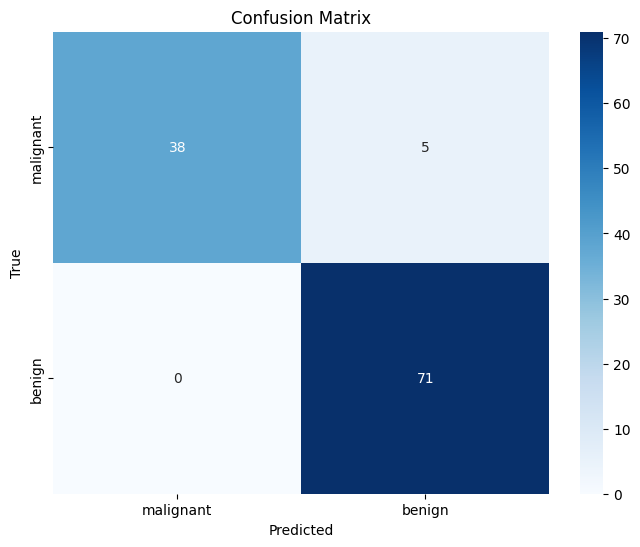

In [42]:
# trying only top 5 features

# Load data into a Pandas DataFrame
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values
df = df.dropna()
# Select only 'area error' and 'worst area' features + 3 more
selected_features = ['area error', 'worst area', 'mean area', 'worst perimeter', 'worst radius']
X = df[selected_features]
y = df['target']

# Split the data
train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.20, random_state=42)

# Model training
gnb = GaussianNB()
model = gnb.fit(train, train_labels)

# Making predictions
predictions = gnb.predict(test)

# Model Evaluation Metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Top 5 features perform nearly as well as all the features.

# Old code

In [ ]:
# splitting sklearn Bunch data into more easily manipulated structures

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [ ]:
print(label_names)

['malignant' 'benign']


In [ ]:
print(labels)
print(len(labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

We can see they are boolean features where 1 is benign and 0 is malignant. We can also se there are 569 instances in this dataset.

In [ ]:
print(len(feature_names))
print(feature_names)

30
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


30 features to select from.

In [ ]:
print(features)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
# importing for training, testing and splitting
from sklearn.model_selection  import train_test_split

# splitting the data
train, test, train_labels, test_labels  = train_test_split(features, labels, test_size = 0.40, random_state = 42)


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# classifier initialising
gnb = GaussianNB()

# classifier train data fitting
model = gnb.fit(train, train_labels)


In [ ]:
# predicting on test data
predictions = gnb.predict(test)
print(predictions)


[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]


### Evaluation

In [ ]:
# accuracy score func
from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, predictions))


0.9517543859649122
